In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [9]:
df = pd.read_pickle(r'C:\CareerFoundary\Achivement 4.10\data\Prepared Data\combined_data.pkl')
print(df.head())

   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2539329        1    prior             1          2                  8   
2   2539329        1    prior             1          2                  8   
3   2539329        1    prior             1          2                  8   
4   2539329        1    prior             1          2                  8   

   days_since_prior_order  product_id  add_to_cart_order  reordered  ...  \
0                     0.0       196.0                1.0        0.0  ...   
1                     0.0     14084.0                2.0        0.0  ...   
2                     0.0     12427.0                3.0        0.0  ...   
3                     0.0     26088.0                4.0        0.0  ...   
4                     0.0     26405.0                5.0        0.0  ...   

  order_frequency_flag First Name  Surnam  Gender    STATE Age date_joined  \
0 

In [7]:
print(df.columns)

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_label', 'busiest_day', 'slowest_day',
       'busiest_period_of_day', 'order_frequency_flag', 'First Name', 'Surnam',
       'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants', 'fam_status',
       'income'],
      dtype='object')


In [9]:
import dask.dataframe as dd

file_path = r"C:\CareerFoundary\Achivement 4.10\data\Prepared Data\combined_data.parquet"

# Load data with Dask
ddf = dd.read_parquet(file_path)

# Convert STATE column to string to avoid category mismatch
ddf['STATE'] = ddf['STATE'].astype(str)

# Define the region mapping
region_map = {
    'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast', 'NH': 'Northeast',
    'RI': 'Northeast', 'VT': 'Northeast', 'NJ': 'Northeast', 'NY': 'Northeast', 'PA': 'Northeast',
    'IL': 'Midwest', 'IN': 'Midwest', 'MI': 'Midwest', 'OH': 'Midwest', 'WI': 'Midwest',
    'IA': 'Midwest', 'KS': 'Midwest', 'MN': 'Midwest', 'MO': 'Midwest', 'NE': 'Midwest', 'ND': 'Midwest', 'SD': 'Midwest',
    'AL': 'South', 'AR': 'South', 'DE': 'South', 'DC': 'South', 'FL': 'South', 'GA': 'South',
    'KY': 'South', 'LA': 'South', 'MD': 'South', 'MS': 'South', 'NC': 'South', 'OK': 'South',
    'SC': 'South', 'TN': 'South', 'TX': 'South', 'VA': 'South', 'WV': 'South',
    'AZ': 'West', 'CA': 'West', 'CO': 'West', 'ID': 'West', 'MT': 'West', 'NV': 'West',
    'NM': 'West', 'OR': 'West', 'UT': 'West', 'WA': 'West', 'WY': 'West', 'HI': 'West', 'AK': 'West'
}

# Apply region mapping
ddf['Region'] = ddf['STATE'].map(region_map, meta=('STATE', 'object')).fillna('Unknown')

# Convert back to category to save memory
ddf['STATE'] = ddf['STATE'].astype('category')
ddf['Region'] = ddf['Region'].astype('category')

# Compute & save processed file
df_processed = ddf.compute()
df_processed.to_parquet(r"C:\CareerFoundary\Achivement 4.10\data\Prepared Data\updated_combined_data.parquet")

# Display the first few rows of the updated DataFrame
print("\n Sample of updated Region column:\n", df_processed[['STATE', 'Region']].head(10))



✅ Sample of updated Region column:
      STATE   Region
0  Alabama  Unknown
1  Alabama  Unknown
2  Alabama  Unknown
3  Alabama  Unknown
4  Alabama  Unknown
5  Alabama  Unknown
6  Alabama  Unknown
7  Alabama  Unknown
8  Alabama  Unknown
9  Alabama  Unknown


In [11]:
print(ddf['STATE'].unique())
print(ddf.columns)

Dask Series Structure:
npartitions=1
    category[unknown]
                  ...
Dask Name: unique, 16 expressions
Expr=Unique(frame=Assign(frame=Assign(frame=Assign(frame=Assign(frame=ReadParquetFSSpec(598fe98)))))['STATE'])
Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_label', 'busiest_day', 'slowest_day',
       'busiest_period_of_day', 'order_frequency_flag', 'First Name', 'Surnam',
       'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants', 'fam_status',
       'income', 'masked_name', 'Region'],
      dtype='object')


In [13]:
# Check for NaN or missing values in 'STATE'
print(ddf['STATE'].isnull().sum().compute())
# Check for unexpected values
print(ddf['STATE'].unique().compute())

0
0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
9                  Florida
10                 Georgia
11                  Hawaii
12                   Idaho
13                Illinois
14                 Indiana
15                    Iowa
16                  Kansas
17                Kentucky
18               Louisiana
19                   Maine
20                 Montana
21                Nebraska
22                  Nevada
23           New Hampshire
24              New Jersey
25              New Mexico
26                New York
27          North Carolina
28            North Dakota
29                    Ohio
30                Oklahoma
31                  Oregon
32                Maryland
33           Massachusetts
34                Michigan
35               Minnesota
36             Mississippi

In [64]:
unknown_region_count = df[df['Region'] == 'Unknown'].shape[0]
print(f"Number of 'Unknown' regions: {unknown_region_count}")


Number of 'Unknown' regions: 32642450


In [66]:
# Clean the 'State' column by stripping whitespace and converting to uppercase
df['STATE'] = df['STATE'].str.strip().str.upper()

# Print out the first few unique states to inspect the format
unique_states = df['STATE'].unique()
print(f"Unique states in the dataset after cleaning: {unique_states[:50]}")  # Show the first 50 unique states


Unique states in the dataset after cleaning: ['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'DISTRICT OF COLUMBIA' 'FLORIDA' 'GEORGIA'
 'HAWAII' 'IDAHO' 'ILLINOIS' 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY'
 'LOUISIANA' 'MAINE' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW HAMPSHIRE'
 'NEW JERSEY' 'NEW MEXICO' 'NEW YORK' 'NORTH CAROLINA' 'NORTH DAKOTA'
 'OHIO' 'OKLAHOMA' 'OREGON' 'MARYLAND' 'MASSACHUSETTS' 'MICHIGAN'
 'MINNESOTA' 'MISSISSIPPI' 'MISSOURI' 'PENNSYLVANIA' 'RHODE ISLAND'
 'SOUTH CAROLINA' 'SOUTH DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH' 'VERMONT'
 'VIRGINIA' 'WASHINGTON' 'WEST VIRGINIA' 'WISCONSIN']


In [73]:
import pandas as pd

# Sample region map with full state names
region_map_full_name = {
    'ALABAMA': 'South', 'ALASKA': 'West', 'ARIZONA': 'West', 'ARKANSAS': 'South', 'CALIFORNIA': 'West',
    'COLORADO': 'West', 'CONNECTICUT': 'Northeast', 'DELAWARE': 'South', 'DISTRICT OF COLUMBIA': 'South',
    'FLORIDA': 'South', 'GEORGIA': 'South', 'HAWAII': 'West', 'IDAHO': 'West', 'ILLINOIS': 'Midwest',
    'INDIANA': 'Midwest', 'IOWA': 'Midwest', 'KANSAS': 'Midwest', 'KENTUCKY': 'South', 'LOUISIANA': 'South',
    'MAINE': 'Northeast', 'MONTANA': 'West', 'NEBRASKA': 'Midwest', 'NEVADA': 'West', 'NEW HAMPSHIRE': 'Northeast',
    'NEW JERSEY': 'Northeast', 'NEW MEXICO': 'West', 'NEW YORK': 'Northeast', 'NORTH CAROLINA': 'South',
    'NORTH DAKOTA': 'Midwest', 'OHIO': 'Midwest', 'OKLAHOMA': 'South', 'OREGON': 'West', 'MARYLAND': 'South',
    'MASSACHUSETTS': 'Northeast', 'MICHIGAN': 'Midwest', 'MINNESOTA': 'Midwest', 'MISSISSIPPI': 'South',
    'MISSOURI': 'Midwest', 'PENNSYLVANIA': 'Northeast', 'RHODE ISLAND': 'Northeast', 'SOUTH CAROLINA': 'South',
    'SOUTH DAKOTA': 'Midwest', 'TENNESSEE': 'South', 'TEXAS': 'South', 'UTAH': 'West', 'VERMONT': 'Northeast',
    'VIRGINIA': 'South', 'WASHINGTON': 'West', 'WEST VIRGINIA': 'South', 'WISCONSIN': 'Midwest', 'WYOMING': 'West'
}

# Assuming df is your DataFrame
# Clean the 'State' column by stripping whitespace and converting to uppercase
df['STATE'] = df['STATE'].str.strip().str.upper()

# Reapply the region mapping
df['Region'] = df['STATE'].map(region_map_full_name).fillna('Unknown')

# Check the value counts for regions to ensure proper mapping
print("\nRegion distribution after applying map:")
print(df['Region'].value_counts())

# Check which states are still mapped to 'Unknown'
unknown_states = df[df['Region'] == 'Unknown']['STATE'].unique()
print(f"\nStates mapped to 'Unknown': {unknown_states}")

# Calculate the average reordering behavior by region
reordering_by_region = df.groupby('Region')['reordered'].mean()

# Display the reordering behavior by region
print("\nReordering behavior by region:")
print(reordering_by_region)


Region distribution after applying map:
Region
South        10871134
West          8353486
Midwest       7652795
Northeast     5765035
Name: count, dtype: int64

States mapped to 'Unknown': []

Reordering behavior by region:
Region
Midwest      0.587074
Northeast    0.591106
South        0.589843
West         0.590921
Name: reordered, dtype: float64


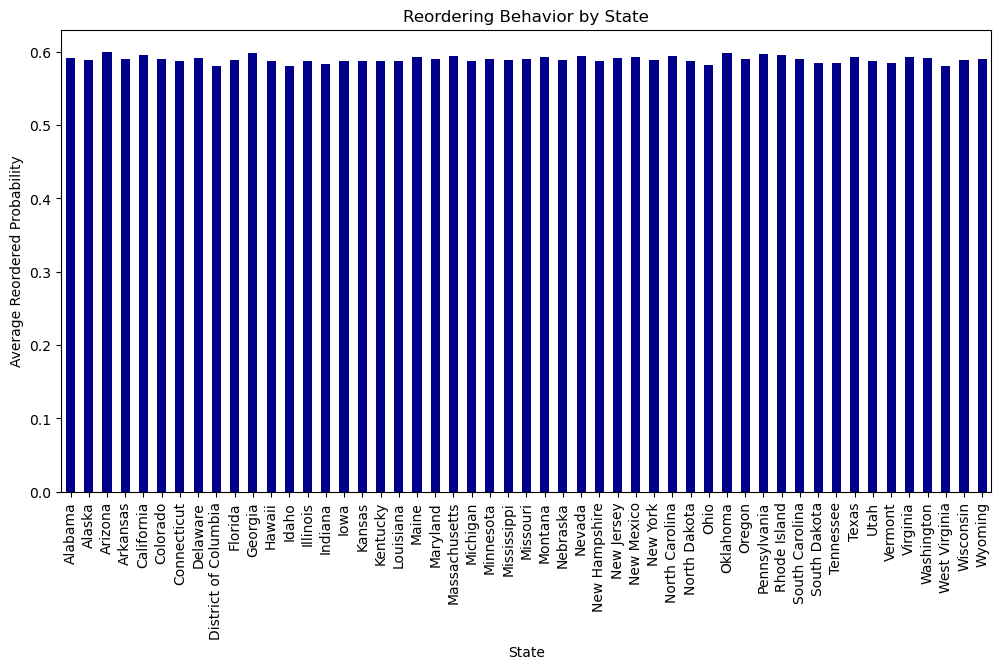

In [19]:
# Example using 'STATE' if 'Region' doesn't exist
reordering_by_state = df.groupby('STATE')['reordered'].mean()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
reordering_by_state.plot(kind='bar', color='darkblue')
plt.title("Reordering Behavior by State")
plt.xlabel("State")
plt.ylabel("Average Reordered Probability")
plt.xticks(rotation=90)

# Save the chart
plt.savefig(r'C:\Users\annma\OneDrive\CareerFoundary\Achivement 4.10\Analysis\Visualization\Behavior_State_distribution.png', bbox_inches='tight')
plt.show()



In [79]:
import pandas as pd

# Assuming 'user_id' is the customer identifier and 'order_id' is the order identifier.
# 1. Count the number of orders per customer (user_id)
customer_order_counts = df.groupby('user_id')['order_id'].nunique()

# 2. Create the exclusion flag for low-activity customers (those with fewer than 5 orders)
df['low_activity_flag'] = df['user_id'].map(customer_order_counts) < 5

# 3. Exclude low-activity customers (those with low_activity_flag = True)
df_filtered = df[~df['low_activity_flag']]

# 4. Export the filtered data to a new file (e.g., parquet or CSV)
df_filtered.to_parquet(r"C:\CareerFoundary\Achivement 4.10\data\Prepared Data\filtered_data.parquet")

# Optionally, display the number of low-activity customers excluded
num_low_activity_customers = df['low_activity_flag'].sum()
print(f"Number of low-activity customers (fewer than 5 orders) excluded: {num_low_activity_customers}")


Number of low-activity customers (fewer than 5 orders) excluded: 711316


In [9]:
import pandas as pd

# Define department(s) related to baby products
baby_related = {18}  # Example: department_id 18 = 'baby'

# Sample dataset
data = {
    'Age': [31, 25, 65, 29, 40],
    'n_dependants': [3, 1, 0, 0, 4],
    'income': [40423, 35000, 28000, 55000, 30000],
    'order_dow': [2, 6, 3, 5, 1],
    'order_hour_of_day': [8, 10, 10, 20, 9],
    'department_id': [4, 18, 7, 13, 5]  # Sample departments
}

# Create DataFrame
df = pd.DataFrame(data)

# Function to classify customer profile
def classify_customer(row):
    age = row['Age']
    dependants = row['n_dependants']
    income = row['income']
    hour = row['order_hour_of_day']
    dept = row['department_id']
    
    if age < 35 and dependants == 0 and income > 40000:
        return 'Single Adult'
    elif age < 40 and 1 <= dependants <= 2 and dept in baby_related:
        return 'Young Parent'
    elif age >= 60 and dependants == 0 and 9 <= hour <= 11:
        return 'Retiree'
    elif dependants >= 3:
        return 'Large Family'
    elif income < 30000:
        return 'Budget Shopper'
    else:
        return 'Other'

# Apply the classification
df['customer_profile'] = df.apply(classify_customer, axis=1)

# Display the DataFrame
print(df)


   Age  n_dependants  income  order_dow  order_hour_of_day  department_id  \
0   31             3   40423          2                  8              4   
1   25             1   35000          6                 10             18   
2   65             0   28000          3                 10              7   
3   29             0   55000          5                 20             13   
4   40             4   30000          1                  9              5   

  customer_profile  
0     Large Family  
1     Young Parent  
2          Retiree  
3     Single Adult  
4     Large Family  


In [13]:
# Example using 'STATE' if 'Region' doesn't exist
reordering_by_state = df.groupby('STATE')['reordered'].mean()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
reordering_by_state.plot(kind='bar', color='darkblue')
plt.title("Reordering Behavior by State")
plt.xlabel("State")
plt.ylabel("Average Reordered Probability")
plt.xticks(rotation=90)

# Save the chart
plt.savefig(r'C:\Users\annma\OneDrive\CareerFoundary\Achivement 4.10\Analysis\Visualization\Behavior_State_distribution.png', bbox_inches='tight')
plt.show()


KeyError: 'customer_profile'

In [13]:
import pandas as pd
import numpy as np

# Sample data setup (if you already have df from before, skip this part)
data = {
    'Age': [31, 25, 65, 29, 40],
    'n_dependants': [3, 1, 0, 0, 4],
    'income': [40423, 35000, 28000, 55000, 30000],
    'order_dow': [2, 6, 3, 5, 1],
    'order_hour_of_day': [8, 10, 10, 20, 9],
    'department_id': [4, 18, 7, 13, 5]
}
df = pd.DataFrame(data)

# Define baby-related departments
baby_related = {18}

# Define profiling function
def classify_customer(row):
    age = row['Age']
    dependants = row['n_dependants']
    income = row['income']
    hour = row['order_hour_of_day']
    dept = row['department_id']
    
    if age < 35 and dependants == 0 and income > 40000:
        return 'Single Adult'
    elif age < 40 and 1 <= dependants <= 2 and dept in baby_related:
        return 'Young Parent'
    elif age >= 60 and dependants == 0 and 9 <= hour <= 11:
        return 'Retiree'
    elif dependants >= 3:
        return 'Large Family'
    elif income < 30000:
        return 'Budget Shopper'
    else:
        return 'Other'

# Apply customer profiling
df['customer_profile'] = df.apply(classify_customer, axis=1)

# Add example usage_frequency and expenditure
np.random.seed(0)
df['usage_frequency'] = np.random.randint(1, 10, size=len(df))
df['expenditure'] = np.random.randint(20, 200, size=len(df))

# Aggregate by customer_profile
agg_df = df.groupby('customer_profile')[['usage_frequency', 'expenditure']].agg(['max', 'mean', 'min'])

# Flatten the MultiIndex columns
agg_df.columns = ['_'.join(col) for col in agg_df.columns]

# Display the result
print(agg_df)


                  usage_frequency_max  usage_frequency_mean  \
customer_profile                                              
Large Family                        8                   7.0   
Retiree                             4                   4.0   
Single Adult                        4                   4.0   
Young Parent                        1                   1.0   

                  usage_frequency_min  expenditure_max  expenditure_mean  \
customer_profile                                                           
Large Family                        6               90              59.5   
Retiree                             4               56              56.0   
Single Adult                        4              107             107.0   
Young Parent                        1               41              41.0   

                  expenditure_min  
customer_profile                   
Large Family                   29  
Retiree                        56  
Single Adult        

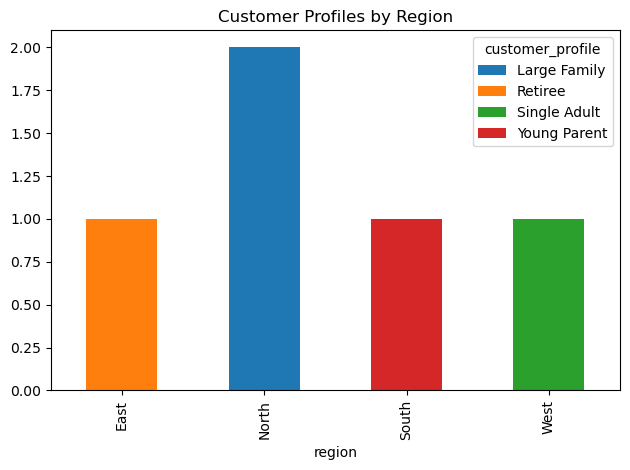

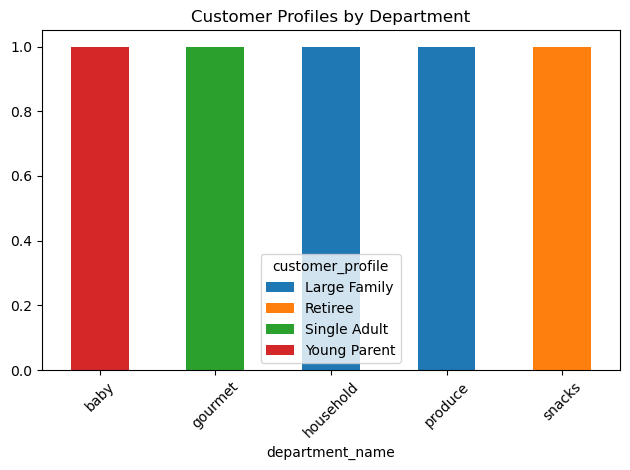

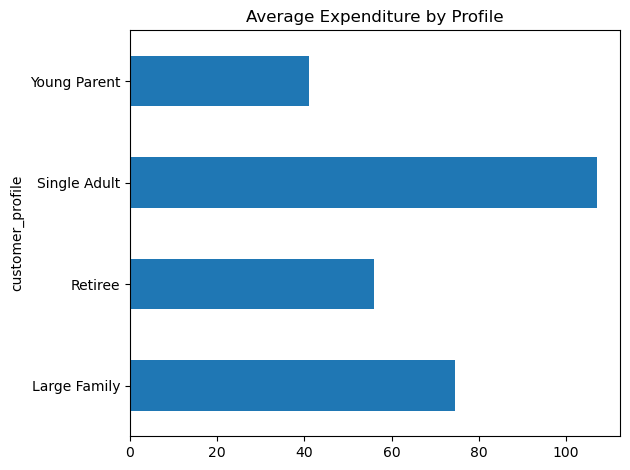

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Sample data
data = {
    'customer_profile': ['Large Family', 'Young Parent', 'Retiree', 'Single Adult', 'Large Family'],
    'region': ['North', 'South', 'East', 'West', 'North'],
    'department_name': ['produce', 'baby', 'snacks', 'gourmet', 'household'],
    'expenditure': [59, 41, 56, 107, 90]
}

df = pd.DataFrame(data)

# Create folder to save charts
output_dir = "project_charts"
os.makedirs(output_dir, exist_ok=True)

# Chart 1: Customer Profiles by Region
df.groupby(['region', 'customer_profile']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Customer Profiles by Region')
plt.tight_layout()
plt.savefig(f"{output_dir}/profiles_by_region.png")
plt.show()

# Chart 2: Customer Profiles by Department
df.groupby(['department_name', 'customer_profile']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Customer Profiles by Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{output_dir}/profiles_by_department.png")
plt.show()

# Chart 3: Average Expenditure by Profile
df.groupby('customer_profile')['expenditure'].mean().plot(kind='barh')
plt.title('Average Expenditure by Profile')
plt.tight_layout()
plt.savefig(f"{output_dir}/avg_expenditure_by_profile.png")
plt.show()


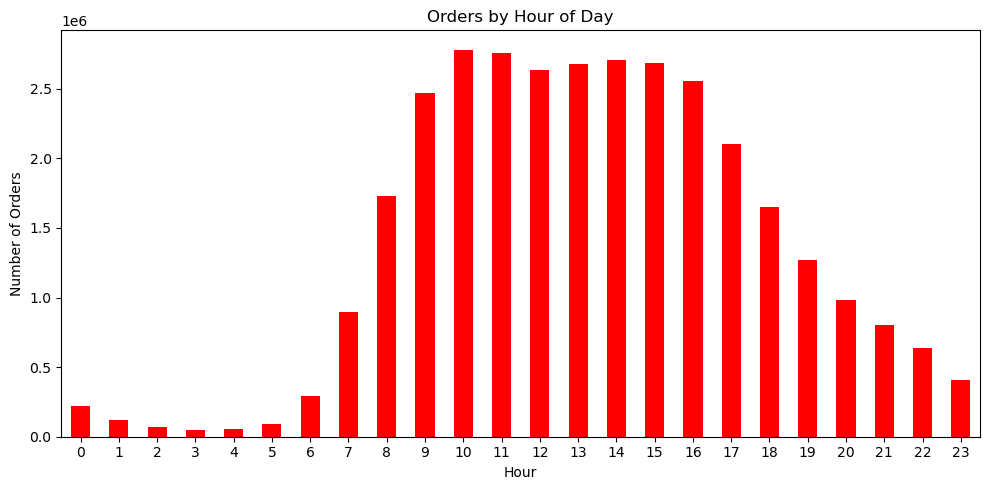

In [23]:
plt.figure(figsize=(10,5))
df['order_hour_of_day'].value_counts().sort_index().plot(kind='bar', color='Red')
plt.title('Orders by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(r'C:\Users\annma\OneDrive\CareerFoundary\Achivement 4.10\Analysis\Visualization\orders_by_hour.png', bbox_inches='tight')
plt.show()


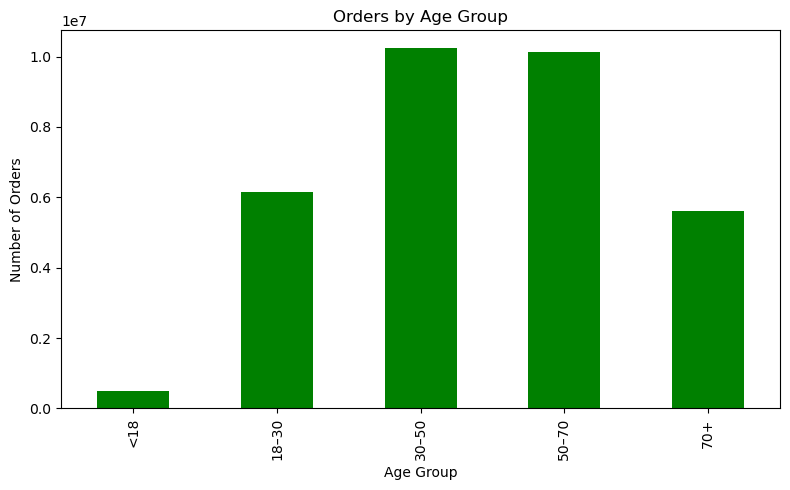

In [29]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 70, 100], labels=['<18', '18–30', '30–50', '50–70', '70+'])

plt.figure(figsize=(8,5))
df['Age_Group'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Orders by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.savefig(r'C:\Users\annma\OneDrive\CareerFoundary\Achivement 4.10\Analysis\Visualization\orders_by_age_group.png', bbox_inches='tight')
plt.show()


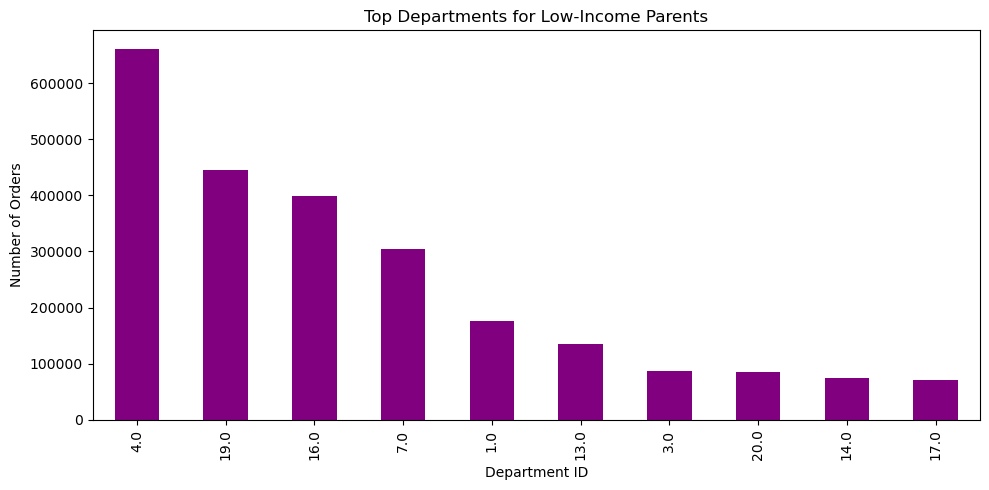

In [32]:
low_income_parents = df[(df['income'] < 50000) & (df['n_dependants'] > 0)]

plt.figure(figsize=(10,5))
low_income_parents['department_id'].value_counts().head(10).plot(kind='bar', color='Purple')
plt.title('Top Departments for Low-Income Parents')
plt.xlabel('Department ID')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.savefig(r'C:\Users\annma\OneDrive\CareerFoundary\Achivement 4.10\Analysis\Visualization\low_income_parents_departments.png', bbox_inches='tight')
plt.show()


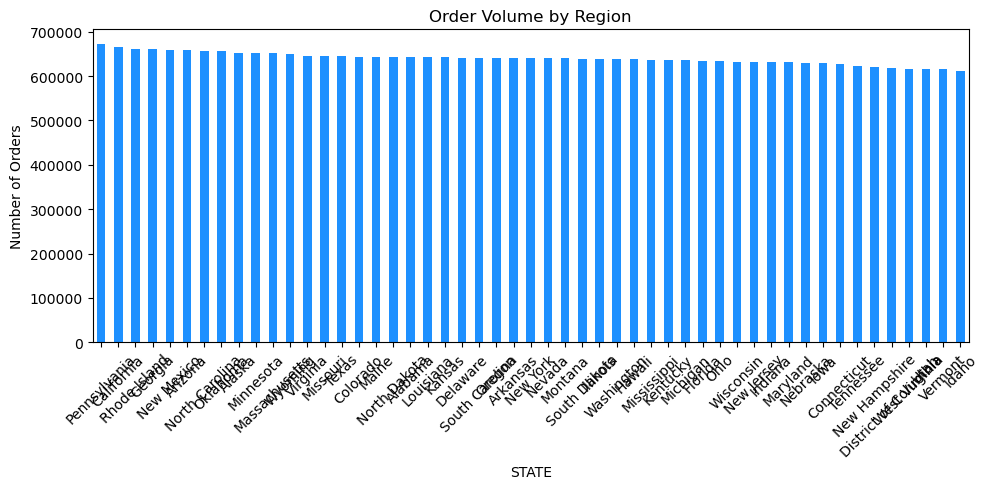

In [36]:
plt.figure(figsize=(10,5))
df['STATE'].value_counts().plot(kind='bar', color='dodgerblue')
plt.title('Order Volume by Region')
plt.xlabel('STATE')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r'C:\Users\annma\OneDrive\CareerFoundary\Achivement 4.10\Analysis\Visualization\order_volume_by_region.png', bbox_inches='tight')
plt.show()


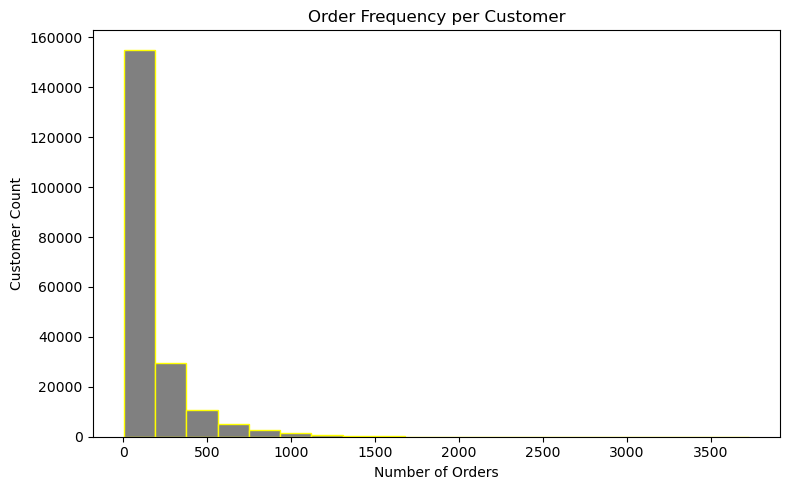

In [43]:
order_counts = df['user_id'].value_counts()

plt.figure(figsize=(8,5))
order_counts.plot(kind='hist', bins=20, color='gray', edgecolor='Yellow')
plt.title('Order Frequency per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Customer Count')
plt.tight_layout()
plt.savefig(r'C:\Users\annma\OneDrive\CareerFoundary\Achivement 4.10\Analysis\Visualization\order_frequency_distribution.png', bbox_inches='tight')
plt.show()


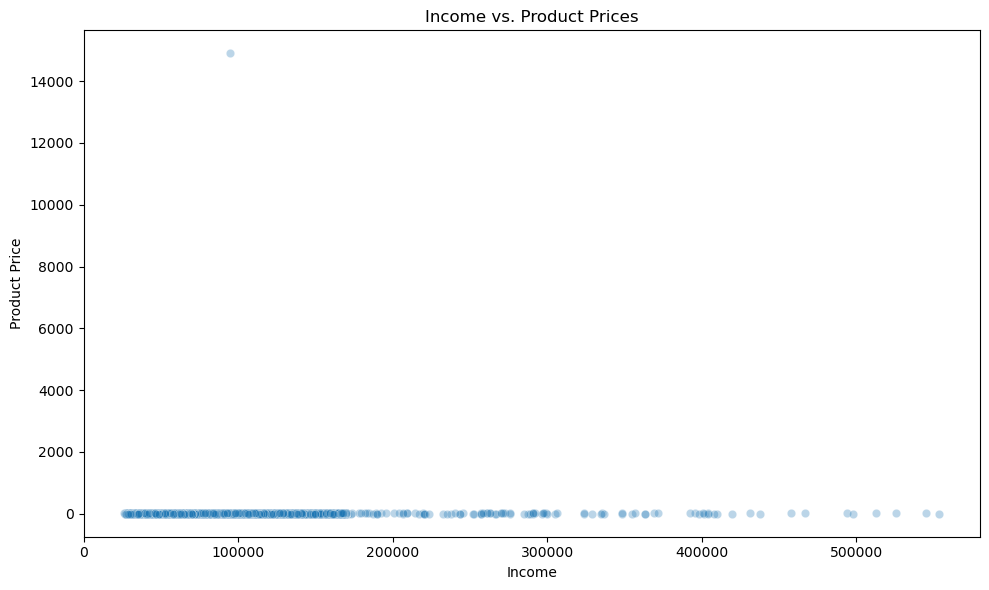

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Take a sample of the data to improve performance
df_sample = df[['income', 'prices']].dropna().sample(n=10000, random_state=42)

# Create the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sample, x='income', y='prices', alpha=0.3)
plt.title('Income vs. Product Prices')
plt.xlabel('Income')
plt.ylabel('Product Price')
plt.tight_layout()

# Save the chart
plt.savefig(r'C:\Users\annma\OneDrive\CareerFoundary\Achivement 4.10\Analysis\Visualization\income_vs_spending.png', bbox_inches='tight')

# Display the chart
plt.show()
